# CGP for image noise filters - Analysis of results

In [29]:
import pandas as pd
from glob import glob
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread
from analyze_results import load_results, plot_conv_lines, plot_run_data_boxplot, to_dataframes


In [8]:
# Following function was taken from https://stackoverflow.com/a/38556650
def show_images(image_paths : list[str]):
    fig = figure()
    number_of_files = len(image_paths)
    for i in range(number_of_files):
        fig.add_subplot(1, number_of_files, i+1)
        image = imread(image_paths[i])
        imshow(image, cmap='gray')
        axis('off')
# End of part taken from https://stackoverflow.com/a/38556650

## Training and testing data
Data were chosen to maximise diversity of textures (and objects) on images. Following images were used for training (as a reference) and testing:

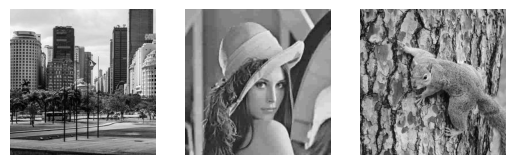

In [10]:
show_images(glob('../data/target256/*'))

As you can see there are three different images - city with narrow lines, lena (as typical testing image) and squirrel withl a lot of curves and various colors.

## CGP parameters
Although there were some experiments focused on influence of specific parameter some parameters of CGP were (mostly) unchanged:

1000 generations

Tournament selection - 2 participants

12 population size

Up to 8 mutated individuals

Primitives (functions of elements in array) - Const255, Const0, Identity, Inversion, Inversion, ConditionalAssignment, Min, Div2, Div4, Add, Sub, AddS, SubS, Avg - functions with arity 0 to 2

30 runs of every tested configuration

## Noise types

Experiments were done with 7 types of noises. Noised images were created by `noise_images.py` and `prepare_data.sh` scripts. Types of noise are:

*gaus* - To some pixels a random value from normal distribution was added (15 % pixels were noised), typical gaussian additive noise

*line-color* - There are horizontal lines with different color (color of each line was generated randomly from normal distribution) (approx. 20 % pixels were affected)

*line* - There are horizontal lines mostly with white color (approx. 20 % pixels were affected)

*line-d* - There are diagonal lines mostly with white color (approx. 20 % ...)

*scratch* - There are small random curves with various colors which creates something like cratches on the image (approx. 25 % pixels were affected)

*scratch_old* - There are small random curves mostly with white color which creates something like cratches on the image (approx. 25 % pixels were affected)

*sp* - Salt and pepper noise (10 %)

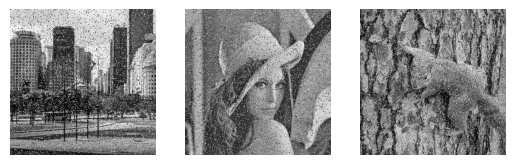

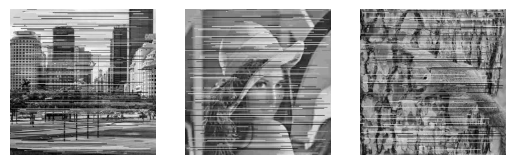

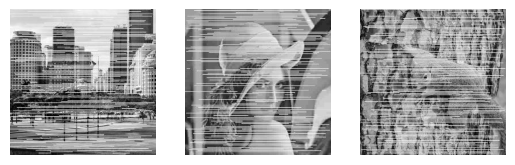

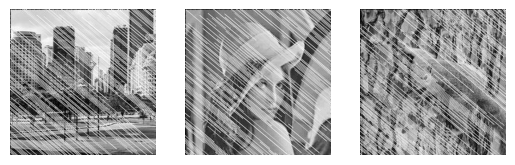

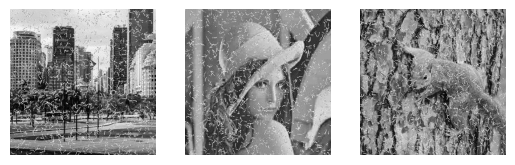

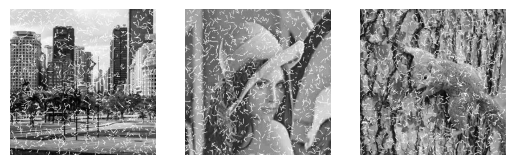

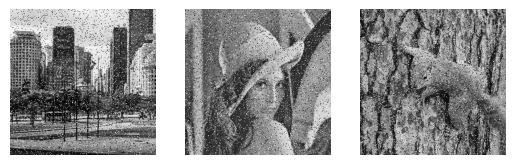

In [12]:
show_images(glob('../data/gaus256/*'))
show_images(glob('../data/line-color256/*'))
show_images(glob('../data/line256/*'))
show_images(glob('../data/lined256/*'))
show_images(glob('../data/scratch256/*'))
show_images(glob('../data/scratch256_old/*'))
show_images(glob('../data/sp256/*'))

## Experiments


### Different noises with initial CGP settings

Initial experiments to try capability to filter each noise type just by initial settings:

Rectangular window 3x3, mutation rate 0.1, l-back 2, rows 9, columns 4

Loading result stored in ../results/just-noises/gaus-03-05-22-09
* Params
* Best filter json description
* Best filter pickled object
* Logs from 30 runs
Loading result stored in ../results/just-noises/line-03-05-22-09
* Params
* Best filter json description
* Best filter pickled object
* Logs from 30 runs
Loading result stored in ../results/just-noises/linecolor-04-05-18-54
* Params
* Best filter json description
* Best filter pickled object
* Logs from 15 runs
Loading result stored in ../results/just-noises/lined-03-05-22-09
* Params
* Best filter json description
* Best filter pickled object
* Logs from 30 runs
Loading result stored in ../results/just-noises/scratch-04-05-18-54
* Params
* Best filter json description
* Best filter pickled object
* Logs from 15 runs
Loading result stored in ../results/just-noises/scratch-old-04-05-18-54
* Params
* Best filter json description
* Best filter pickled object
* Logs from 15 runs
Loading result stored in ../results/just-noises/sp-04-05-18-

<Axes: xlabel='Experiment', ylabel='fitness'>

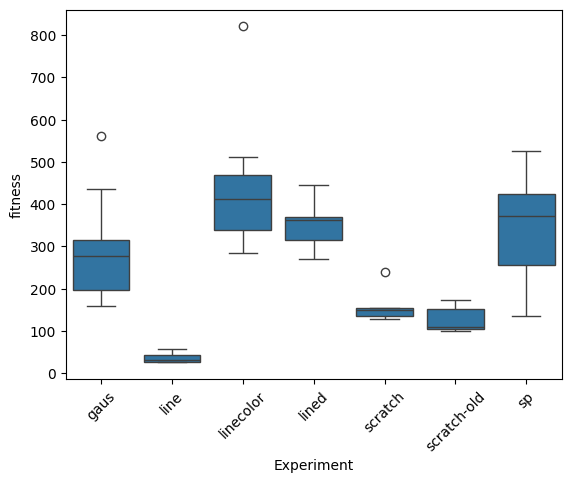

In [30]:
results = load_results(['../results/just-noises/*'])
experiments, runs, generations = to_dataframes(results)

plot_run_data_boxplot(experiments, runs, data_name='fitness')

<Axes: xlabel='Generation', ylabel='Fitness'>

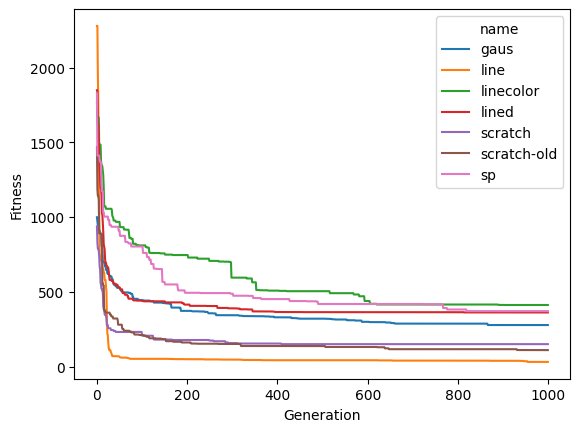

In [31]:
plot_conv_lines(experiments, generations, plot_params={ 'estimator' : 'median',  'errorbar' : None})

### Different mutation rates

Experiment was focused to try different mutation rates for some of noise types:

gaus, lined, scratch, sp were tried with mutation rates 0.02, 0.1, 1.5

### Different matrix size

gaus, lined, scratch, sp were tried with matrix sizes 2x10, 5x5, 9x6

### Universal-filter

### Window shape